<a href="https://colab.research.google.com/github/PaulToronto/DataCamp_TimeSeries/blob/main/02_Basic_Time_Series_Metrics_and_Resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 - Basic Time Series Metrics and Resampling

This chapter dives deeper into the essential time series functionality made available through the pandas DataTimeIndex. It introduces resampling and how to compare different time series by normalizing their start points.

## Imports and `data_path`

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data_path = 'https://raw.githubusercontent.com/'
data_path += 'PaulToronto/DataCamp_TimeSeries/main/'

## Compare time series growth rates

- Stock price series: hard to compare at different levels
- Simple solution: normalize price series to start at 100
- Divide all prices by first in series, multiply by 100
  - Same starting point
  - All prices relative to starting point
  - Difference to starting point in percentage points

### Normalizing a single series

In [3]:
google = pd.read_csv(data_path + 'stock_data/apple_google.csv',
                     parse_dates=['Date'],
                     index_col='Date')
google = google[['GOOG']]
google.columns = ['price']
google.index.name = 'date'
google.head()

,price
date,
2010-01-04,313.06
2010-01-05,311.68
2010-01-06,303.83
2010-01-07,296.75
2010-01-08,300.71


In [4]:
first_price = google['price'].iloc[0]
first_price

313.06

In [5]:
# also works
google.loc['2010-01-04', 'price']

313.06

In [6]:
normalized = google['price'].div(first_price).mul(100)
normalized.head()

date
2010-01-04    100.000000
2010-01-05     99.559190
2010-01-06     97.051683
2010-01-07     94.790136
2010-01-08     96.055069
Name: price, dtype: float64

In [7]:
pd.DataFrame({'price': google['price'],
              'normalized': normalized}).head()

,price,normalized
date,,
2010-01-04,313.06,100.000000
2010-01-05,311.68,99.559190
2010-01-06,303.83,97.051683
2010-01-07,296.75,94.790136
2010-01-08,300.71,96.055069


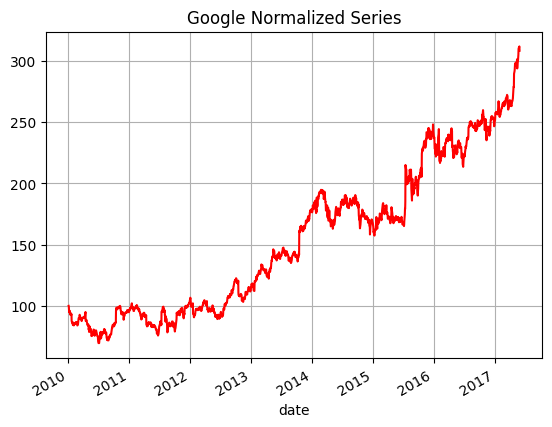

In [8]:
normalized.plot(title='Google Normalized Series', color='red')
plt.grid()
plt.show()

### Normalizing multiple series

In [9]:
prices = pd.read_csv(data_path + 'stock_data/stock_data.csv', parse_dates=['Date'], index_col='Date')
prices =prices[['AAPL', 'AMZN', 'RIO']]
prices.index.name = 'date'
prices = prices[prices.notnull().all(axis=1)]
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2010-01-04 to 2016-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMZN    1761 non-null   float64
 2   RIO     1761 non-null   float64
dtypes: float64(3)
memory usage: 55.0 KB


In [10]:
prices.head(3)

,AAPL,AMZN,RIO
date,,,
2010-01-04,30.57,133.90,56.03
2010-01-05,30.63,134.69,56.90
2010-01-06,30.14,132.25,58.64


In [11]:
benchmarks = pd.read_csv(data_path + 'stock_data/sp500.csv', parse_dates=['date'], index_col='date')
benchmarks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB


In [12]:
benchmarks.head(3)

,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87


In [14]:
# these get aligned by the index, also note: `.dropna()
prices = pd.concat([prices, benchmarks], axis=1).dropna()
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMZN    1761 non-null   float64
 2   RIO     1761 non-null   float64
 3   SP500   1761 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB


In [15]:
prices.head()

,AAPL,AMZN,RIO,SP500
date,,,,
2010-01-04,30.57,133.90,56.03,1132.99
2010-01-05,30.63,134.69,56.90,1136.52
2010-01-06,30.14,132.25,58.64,1137.14
2010-01-07,30.08,130.00,58.65,1141.69
2010-01-08,30.28,133.52,59.30,1144.98


In [16]:
normalized = prices.div(prices.iloc[0]).mul(100)
normalized.head()

,AAPL,AMZN,RIO,SP500
date,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000
2010-01-05,100.196271,100.589993,101.552740,100.311565
2010-01-06,98.593392,98.767737,104.658219,100.366287
2010-01-07,98.397121,97.087379,104.676066,100.767880
2010-01-08,99.051358,99.716206,105.836159,101.058262


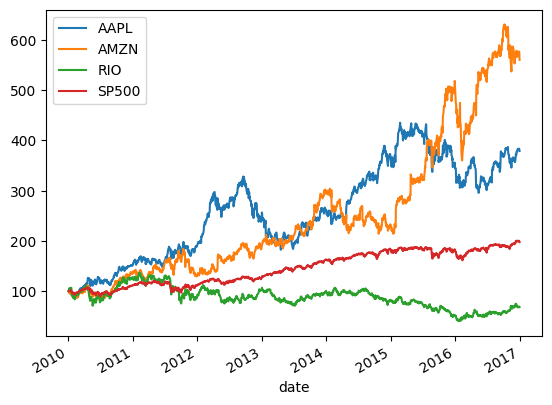

In [17]:
normalized.plot();

### Plotting performance difference

In [18]:
tickers = ['AAPL', 'AMZN', 'RIO']
diff = normalized[tickers].sub(normalized['SP500'], axis=0)
diff.head()

,AAPL,AMZN,RIO
date,,,
2010-01-04,0.000000,0.000000,0.000000
2010-01-05,-0.115294,0.278428,1.241175
2010-01-06,-1.772895,-1.598550,4.291931
2010-01-07,-2.370758,-3.680501,3.908187
2010-01-08,-2.006904,-1.342056,4.777897


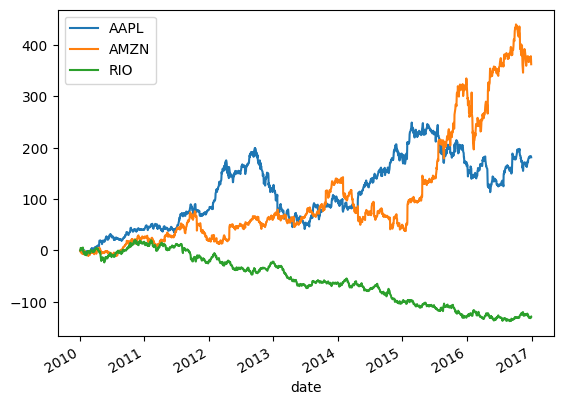

In [19]:
diff.plot();

### Exercises

In [24]:
prices = pd.read_csv(data_path + 'stock_data/asset_classes.csv',
                     parse_dates=['DATE'], index_col='DATE')
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB


In [25]:
first_prices = prices.iloc[0]
first_prices

SP500    1503.35
Bonds     402.15
Gold      648.50
Oil        70.47
Name: 2007-06-29 00:00:00, dtype: float64

In [27]:
normalized = prices.div(first_prices).mul(100)
normalized.head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,100.000000,100.000000,100.000000,100.000000
2007-07-02,101.069611,100.201417,100.308404,100.908188
2007-07-03,101.431470,99.967674,101.349268,101.333901
2007-07-05,101.466724,99.502673,101.141095,101.901518
2007-07-06,101.801976,99.293796,99.884348,103.306372


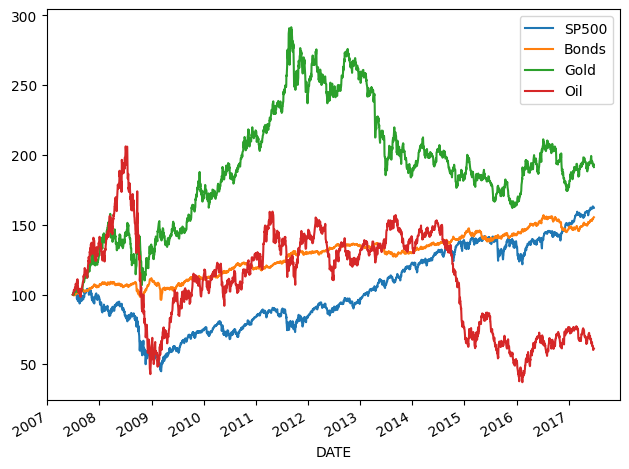

In [28]:
normalized.plot()
plt.tight_layout()
plt.show()

In [29]:
stocks = pd.read_csv(data_path + 'stock_data/nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv(data_path + 'stock_data/dow_jones.csv', parse_dates=['date'], index_col='date')

In [30]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
dtypes: float64(3)
memory usage: 55.1 KB


In [31]:
dow_jones.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DJIA    1762 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB


In [32]:
data = pd.concat([stocks, dow_jones], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB


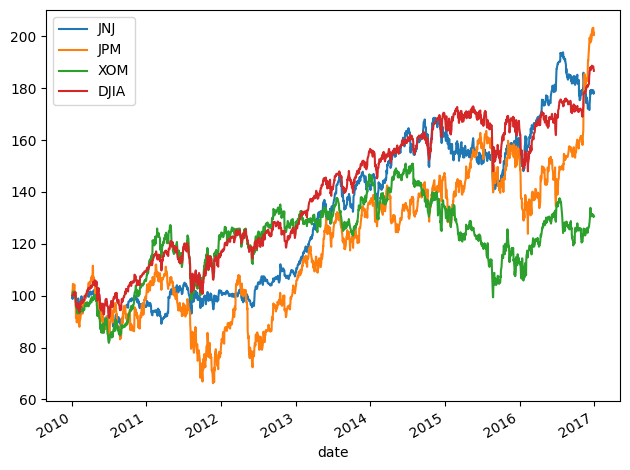

In [37]:
data.div(data.iloc[0]).mul(100).plot()
plt.tight_layout()
plt.show()

In [41]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv(data_path + 'stock_data/msft_aapl.csv', parse_dates=['date'], index_col='date')

# Import index here
sp500 = pd.read_csv(data_path + 'stock_data/sp500.csv', parse_dates=['date'], index_col='date')

In [44]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2007-01-03 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2517 non-null   float64
 1   MSFT    2517 non-null   float64
dtypes: float64(2)
memory usage: 59.0 KB


In [45]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB


In [46]:
data = pd.concat([stocks, sp500], axis=1).dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2394 entries, 2007-06-29 to 2016-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2394 non-null   float64
 1   MSFT    2394 non-null   float64
 2   SP500   2394 non-null   float64
dtypes: float64(3)
memory usage: 74.8 KB


In [48]:
normalized = data.div(data.iloc[0]).mul(100)
normalized.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2394 entries, 2007-06-29 to 2016-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2394 non-null   float64
 1   MSFT    2394 non-null   float64
 2   SP500   2394 non-null   float64
dtypes: float64(3)
memory usage: 74.8 KB


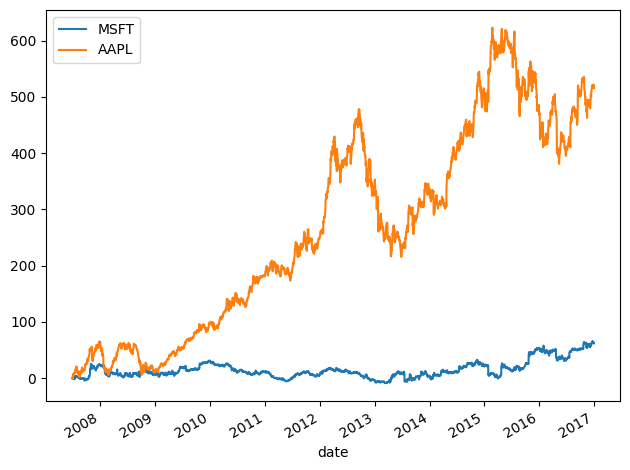

In [50]:
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.tight_layout()
plt.show()

## Changing the time series fequency: resampling

- `DateTimeIndex`: set and change frequency using `.asfreq()`
- but frequency conversion affects the data
  - **Upsampling**
    - convert the data to a higher frequency
    - adds new rows
    - fill or interpolate missing data
  - **Downsampling**
    - convert the data to a lower frequency
    - reduces number of rows
    - need to tell pandas how to aggregate existing data
- pandas API
  - `.asfreq()`
  - `.reindex()`
  - `.resample()` + transformation method

### Upsampling

- convert the data to a higher frequency
- adds new rows
- fill or interpolate missing data

In [ ]:
dates = pd.date_range(start='2016', periods=4, freq='Q')
data = range(1, 5)
quarterly = pd.Series(data=data, index=dates)
quarterly

2016-03-31    1
2016-06-30    2
2016-09-30    3
2016-12-31    4
Freq: Q-DEC, dtype: int64

In [ ]:
# new dates are added BETWEEN the existing dates
monthly = quarterly.asfreq('M')
monthly

2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

#### Three ways to deal with missing data as a result of upsamplinig

- `method='ffill'`
- `method='bfill'`
- `fill_value=value`

In [ ]:
# Series to DataFrame passing column name as parameter
monthly = monthly.to_frame('baseline')
monthly

,baseline
2016-03-31,1.0
2016-04-30,NaN
2016-05-31,NaN
2016-06-30,2.0
2016-07-31,NaN
2016-08-31,NaN
2016-09-30,3.0
2016-10-31,NaN
2016-11-30,NaN
2016-12-31,4.0


In [ ]:
monthly['ffill'] = quarterly.asfreq('M', method='ffill')
monthly['bfill'] = quarterly.asfreq('M', method='bfill')
monthly['value'] = quarterly.asfreq('M', fill_value=0)
monthly

,baseline,ffill,bfill,value
2016-03-31,1.0,1,1,1
2016-04-30,NaN,1,2,0
2016-05-31,NaN,1,2,0
2016-06-30,2.0,2,2,2
2016-07-31,NaN,2,3,0
2016-08-31,NaN,2,3,0
2016-09-30,3.0,3,3,3
2016-10-31,NaN,3,4,0
2016-11-30,NaN,3,4,0
2016-12-31,4.0,4,4,4


#### `.reindex()`

- like using `.asfreq()`, but instead of adding new dates **between** as above, you have control of what the new dates are
- same filling logic as `.asfreq()` with `method` and `fill_value` parameters

In [ ]:
dates = pd.date_range(start='2016', periods=12, freq='M')
dates

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
quarterly

2016-03-31    1
2016-06-30    2
2016-09-30    3
2016-12-31    4
Freq: Q-DEC, dtype: int64

In [ ]:
quarterly.reindex(dates)

2016-01-31    NaN
2016-02-29    NaN
2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

## Upsampling and interpolation with `.resample()`

- `.resample()` follows a logic similar to `.groupby()`
- It groups data within resampling period and applies one or several methods to each group
- New date determined by offset: start, end, custom
- **Upsampling**: fill from existing or interpolate values
- **Downsampling**: apply aggregation to existing data

### Create weekly from monthly unemployment data

In [ ]:
unrate = pd.read_csv('stock_data/unrate_2000.csv', parse_dates=['date'], index_col='date')
unrate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2000-01-01 to 2017-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  209 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [ ]:
# reporting date: 1st day of month
unrate

,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0
...,...
2017-01-01,4.8
2017-02-01,4.7
2017-03-01,4.5


In [ ]:
# so far, we have focused on month-end frequency
#. after resampling, new data is assigned to the last calendar
#. of each month
unrate.asfreq('M')

,UNRATE
date,
2000-01-31,NaN
2000-02-29,NaN
2000-03-31,NaN
2000-04-30,NaN
2000-05-31,NaN
...,...
2016-12-31,NaN
2017-01-31,NaN
2017-02-28,NaN


Alternatives to month-end frequency:
- Calendar month end: alias 'M'
- Calendar month start: alias 'MS'
- Business month end: alias 'BM'
- Business month start: alias 'BMS'

In [ ]:
unrate.asfreq('MS').head() # month start

,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


In [ ]:
unrate.asfreq('BM').head() # business month end

,UNRATE
date,
2000-01-31,NaN
2000-02-29,NaN
2000-03-31,NaN
2000-04-28,NaN
2000-05-31,NaN


In [ ]:
unrate.asfreq('BMS').head() # business month start

,UNRATE
date,
2000-01-03,NaN
2000-02-01,4.1
2000-03-01,4.0
2000-04-03,NaN
2000-05-01,4.0


### Assign frequency. with `.resample()`

- `.resample()` returns data only when calling another method

In [ ]:
# compare with .asfreq()
unrate.asfreq('MS').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2000-01-01 to 2017-05-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  209 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [ ]:
unrate.resample('MS') # this a Resample object

In [ ]:
# .resample() returns data only when calling another method
unrate.resample('MS').asfreq()

,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0
...,...
2017-01-01,4.8
2017-02-01,4.7
2017-03-01,4.5


In [ ]:
unrate.resample('MS').asfreq().equals(unrate.asfreq('MS'))

True

In [ ]:
unrate.resample('MS').asfreq().equals(unrate)

True

### Quarterly real GDP growth

In [ ]:
gdp = pd.read_csv('stock_data/gdp_growth.csv', parse_dates=['date'], index_col='date')
# notice that there is no frequency information
gdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes


In [ ]:
# inspite of there being no frequency information above
#. the first few rows confirm that the data are reported
#. for the first day of each quarter
gdp.head()

,gdp_growth
date,
2007-01-01,0.2
2007-04-01,3.1
2007-07-01,2.7
2007-10-01,1.4
2008-01-01,-2.7


In [ ]:
gdp.asfreq('QS').equals(gdp)

True

In [ ]:
# notice the freqency information
#. in the output of .info()
gdp.asfreq('QS').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Freq: QS-JAN
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes


### Interpolate monthly real GDP growth

- `.interpolate()` finds points on a straight line between existing data

In [ ]:
gdp_1 = gdp.resample('MS').ffill().add_suffix('_ffill')
gdp_1

,gdp_growth_ffill
date,
2007-01-01,0.2
2007-02-01,0.2
2007-03-01,0.2
2007-04-01,3.1
2007-05-01,3.1
...,...
2016-09-01,3.5
2016-10-01,2.1
2016-11-01,2.1


In [ ]:
gdp_1.equals(gdp.asfreq('MS', method='ffill').add_suffix('_ffill'))

True

In [ ]:
# this is where the advantage of `.resample()` over `.asfreq()`
#. comes into play
gdp_2 = gdp.resample('MS').interpolate().add_suffix('_inter')
gdp_2

,gdp_growth_inter
date,
2007-01-01,0.200000
2007-02-01,1.166667
2007-03-01,2.133333
2007-04-01,3.100000
2007-05-01,2.966667
...,...
2016-09-01,2.566667
2016-10-01,2.100000
2016-11-01,1.866667


### Concatenating two DataFrames

In [ ]:
df1 = pd.DataFrame([1, 2, 3], columns=['df1'])
df1

,df1
0,1
1,2
2,3


In [ ]:
df2 = pd.DataFrame([4, 5, 6], columns=['df2'])
df2

,df2
0,4
1,5
2,6


In [ ]:
pd.concat([df1, df2]) # axis=0 by default

,df1,df2
0,1.0,NaN
1,2.0,NaN
2,3.0,NaN
0,NaN,4.0
1,NaN,5.0
2,NaN,6.0


In [ ]:
pd.concat([df1, df2], axis=1)

,df1,df2
0,1,4
1,2,5
2,3,6


### Plot interpolated GDP growth

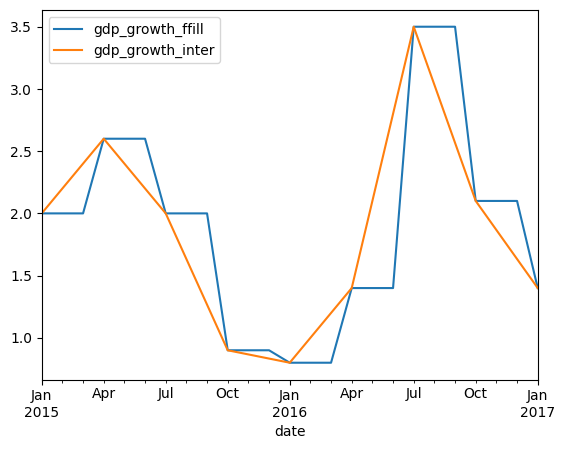

In [ ]:
pd.concat([gdp_1, gdp_2], axis=1).loc['2015':].plot();

### Combine GDP growth and unemployment

In [ ]:
unrate.loc['2007':'2017-01-01'].shape, gdp_2.shape

((121, 1), (121, 1))

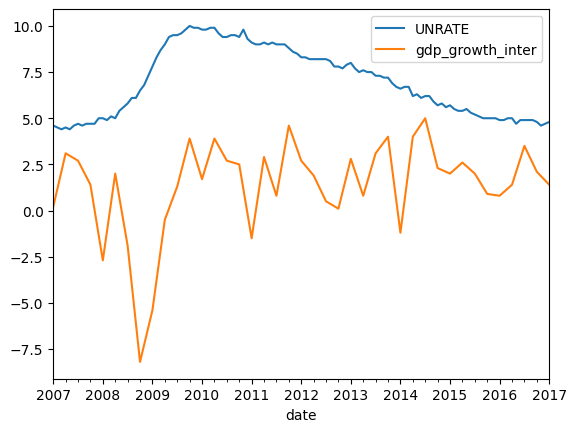

In [ ]:
pd.concat([unrate.loc['2007':'2017-01-01'], gdp_2], axis=1).plot();

In [ ]:
unrate.loc['2007':'2017-01-01']

,UNRATE
date,
2007-01-01,4.6
2007-02-01,4.5
2007-03-01,4.4
2007-04-01,4.5
2007-05-01,4.4
...,...
2016-09-01,4.9
2016-10-01,4.8
2016-11-01,4.6


## Downsampling & aggregation

- **Upsampling**
  - increase the frequency
  -fill from existing or interpolate values
- **Downsampling**
  - decrease the frequency
  - apply aggregation to existing data
- Examples:
  - hour to day
  - day to month
  - etc
- How to represent the existing values at the new date?
  - mean, median, last value, ...

### Air quality: daily ozone levels

In [ ]:
ozone = pd.read_csv('air_quality_data/ozone_nyc.csv', parse_dates=['date'], index_col='date')
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


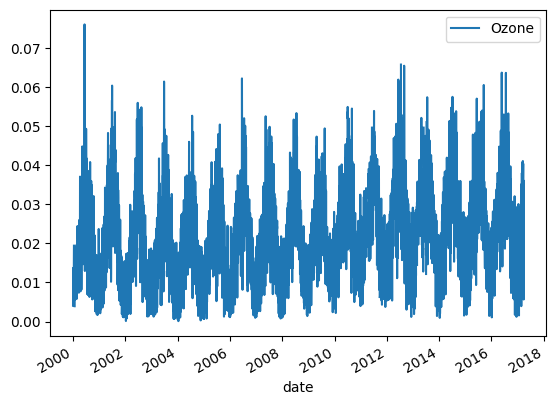

In [ ]:
ozone.plot();

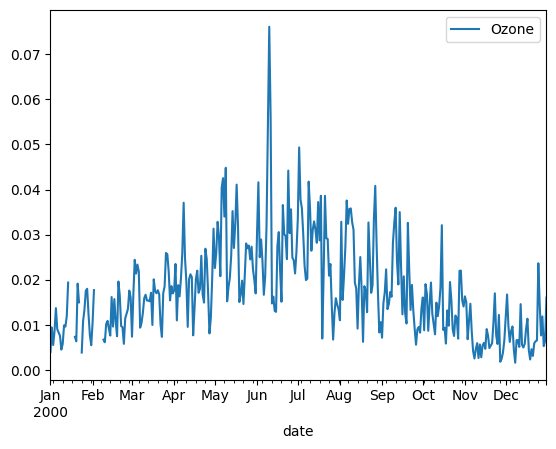

In [ ]:
ozone.loc['2000'].plot();

In [ ]:
# give the ozone data a frequency
#. the resulting DateTimeIndex has additional entries,
#. as well as the expected frequency information.
ozone = ozone.resample('D').asfreq()
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


### Creating monthly ozone data

In [ ]:
# monthly frequency with a default month-end offset
ozone.resample('M').mean().head()

,Ozone
date,
2000-01-31,0.010443
2000-02-29,0.011817
2000-03-31,0.016810
2000-04-30,0.019413
2000-05-31,0.026535


In [ ]:
ozone.loc['2000-01'].mean()

Ozone    0.010443
dtype: float64

In [ ]:
# multiple aggregations at once
ozone.resample('M').agg(['mean', 'std']).head()

Ozone          
                mean       std
date                          
2000-01-31  0.010443  0.004755
2000-02-29  0.011817  0.004072
2000-03-31  0.016810  0.004977
2000-04-30  0.019413  0.006574
2000-05-31  0.026535  0.008409

### Plotting resampled ozone data

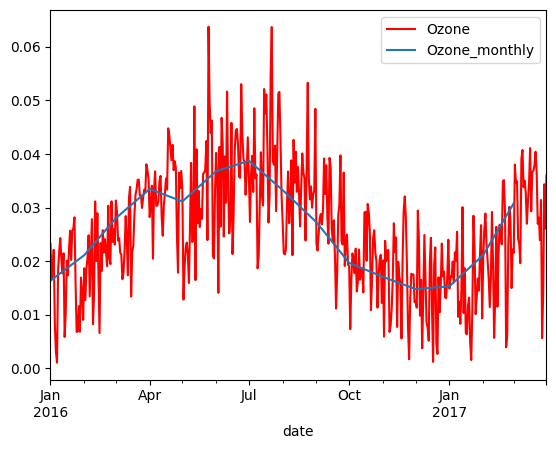

In [ ]:
ozone = ozone.loc['2016':]
ax = ozone.plot(c='r')
monthly = ozone.resample('M').mean()
monthly.add_suffix('_monthly').plot(ax=ax);

### Resampling muliple time series

In [ ]:
df = pd.read_csv('air_quality_data/nyc.csv', parse_dates=['date'], index_col='date')
df = df.resample('D').asfreq()
df = df.loc['2000':].drop('co', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6167 non-null   float64
 1   pm25    6167 non-null   float64
dtypes: float64(2)
memory usage: 147.7 KB


In [ ]:
df.head()

,ozone,pm25
date,,
2000-01-01,0.004032,37.32
2000-01-02,0.009486,42.40
2000-01-03,0.005580,31.25
2000-01-04,0.008717,12.95
2000-01-05,0.013754,7.80


In [ ]:
data = df.resample('BM').mean() # business month end
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207 entries, 2000-01-31 to 2017-03-31
Freq: BM
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   207 non-null    float64
 1   pm25    207 non-null    float64
dtypes: float64(2)
memory usage: 4.9 KB


In [ ]:
data.head()

,ozone,pm25
date,,
2000-01-31,0.010443,17.766849
2000-02-29,0.011817,21.026027
2000-03-31,0.016810,13.775684
2000-04-28,0.018955,11.478882
2000-05-31,0.026492,14.609524


In [ ]:
df.resample('M').last().head()

,ozone,pm25
date,,
2000-01-31,0.005545,20.800000
2000-02-29,0.016139,6.500000
2000-03-31,0.017004,8.493333
2000-04-30,0.031354,6.889474
2000-05-31,0.017012,13.600000


In [ ]:
df.loc['2000-01'].tail(1)

,ozone,pm25
date,,
2000-01-31,0.005545,20.8


In [ ]:
df.resample('MS').first().head(1)

,ozone,pm25
date,,
2000-01-01,0.004032,37.32


In [ ]:
df.loc['2000-01']

,ozone,pm25
date,,
2000-01-01,0.004032,37.320000
2000-01-02,0.009486,42.400000
2000-01-03,0.005580,31.250000
2000-01-04,0.008717,12.950000
2000-01-05,0.013754,7.800000
2000-01-06,0.009069,9.400000
2000-01-07,0.008333,19.206667
2000-01-08,0.007639,17.100000
2000-01-09,0.004569,26.000000
